# Load Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Set dataset path for Kaggle Notebook

In [2]:
dataset_path = "/kaggle/input/leapgestrecog/leapGestRecog" 
print("Dataset Path:", dataset_path)


Dataset Path: /kaggle/input/leapgestrecog/leapGestRecog


# Define gestures

In [3]:
GESTURES = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']

# Load Images

In [4]:
def load_images():
    images, labels = [], []
    subjects = os.listdir(dataset_path)
    print("Subjects in dataset:", subjects)  # Debugging output
    
    for subject_folder in subjects:
        subject_path = os.path.join(dataset_path, subject_folder)
        if not os.path.isdir(subject_path):
            continue
        print(f"Processing subject: {subject_folder}")  # Debugging output
        for gesture_folder in os.listdir(subject_path):
            gesture_path = os.path.join(subject_path, gesture_folder)
            if os.path.isdir(gesture_path):
                print(f"Processing gesture: {gesture_folder} in {gesture_path}")  # Debugging output
                for img_file in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_file)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img = cv2.resize(img, (120, 120))
                        images.append(img)
                        labels.append(GESTURES.index(gesture_folder.split('_')[1]))
    print(f"Total images loaded: {len(images)}")
    
    if len(images) == 0:
        raise ValueError("No images were loaded. Please verify dataset path and structure.")
    
    images = np.array(images).reshape(-1, 120, 120, 1) / 255.0
    labels = to_categorical(labels, len(GESTURES))
    return images, labels


# Load and split the data

In [5]:
X, y = load_images()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Subjects in dataset: ['07', '05', '06', '02', '04', '00', '08', '09', '03', '01']
Processing subject: 07
Processing gesture: 02_l in /kaggle/input/leapgestrecog/leapGestRecog/07/02_l
Processing gesture: 04_fist_moved in /kaggle/input/leapgestrecog/leapGestRecog/07/04_fist_moved
Processing gesture: 09_c in /kaggle/input/leapgestrecog/leapGestRecog/07/09_c
Processing gesture: 10_down in /kaggle/input/leapgestrecog/leapGestRecog/07/10_down
Processing gesture: 06_index in /kaggle/input/leapgestrecog/leapGestRecog/07/06_index
Processing gesture: 08_palm_moved in /kaggle/input/leapgestrecog/leapGestRecog/07/08_palm_moved
Processing gesture: 07_ok in /kaggle/input/leapgestrecog/leapGestRecog/07/07_ok
Processing gesture: 05_thumb in /kaggle/input/leapgestrecog/leapGestRecog/07/05_thumb
Processing gesture: 01_palm in /kaggle/input/leapgestrecog/leapGestRecog/07/01_palm
Processing gesture: 03_fist in /kaggle/input/leapgestrecog/leapGestRecog/07/03_fist
Processing subject: 05
Processing gesture: 

# Model

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(GESTURES), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model training

In [7]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 206s 408ms/step - accuracy: 0.7563 - loss: 0.7317 - val_accuracy: 0.9970 - val_loss: 0.0101
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 191s 382ms/step - accuracy: 0.9887 - loss: 0.0377 - val_accuracy: 0.9985 - val_loss: 0.0049
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 189s 378ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 205s 411ms/step - accuracy: 0.9925 - loss: 0.0205 - val_accuracy: 0.9980 - val_loss: 0.0086
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 190s 380ms/step - accuracy: 0.9945 - loss: 0.0145 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 199s 398ms/step - accuracy: 0.9972 - loss: 0.0075 - val_accuracy: 0.9985 - val_loss: 0.0063
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 208s 411ms/step - accuracy: 0.9963 - loss: 0.0136 - val_accuracy: 0.9990 - val_loss: 0.0049
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 247s 381ms/step - accuracy: 0.9949 -

# Plotting results

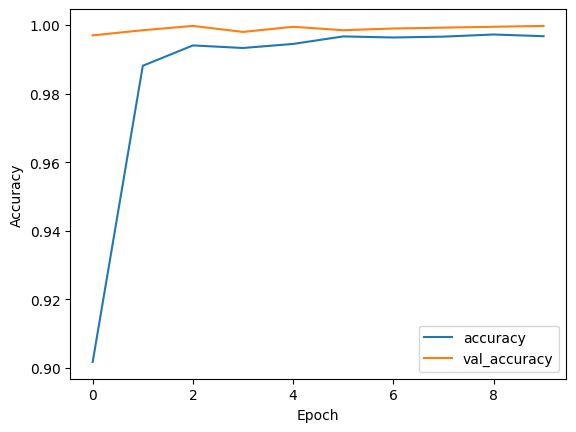

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model evaluation

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
unique_labels = np.unique(y_true_classes)
filtered_gestures = [GESTURES[i] for i in unique_labels]
print(classification_report(y_true_classes, y_pred_classes, target_names=filtered_gestures))


125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step
Test Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

        palm       1.00      1.00      1.00       802
           l       1.00      1.00      1.00       417
        fist       1.00      1.00      1.00       770
       thumb       1.00      1.00      1.00       409
       index       1.00      1.00      1.00       377
          ok       1.00      1.00      1.00       403
           c       1.00      1.00      1.00       404
        down       1.00      1.00      1.00       418

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



# Display test images with predictions

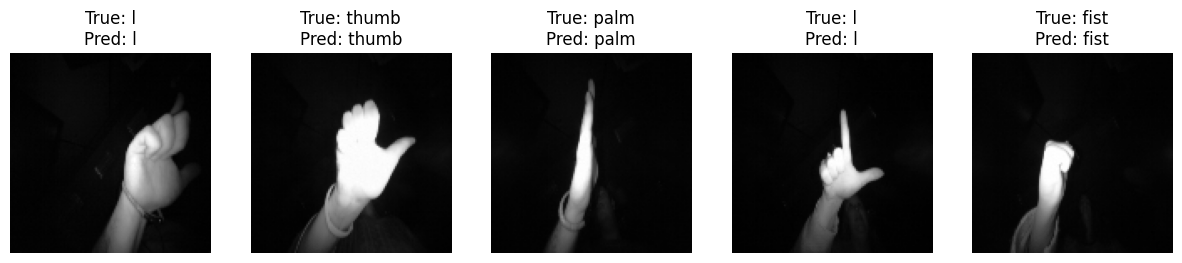

In [10]:
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    idx = np.random.randint(len(X_test))
    img = X_test[idx].reshape(120, 120)
    true_label = GESTURES[y_true_classes[idx]]
    predicted_label = GESTURES[y_pred_classes[idx]]
    
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}")
    axes[i].axis('off')
plt.show()